<a href="https://colab.research.google.com/github/1kaiser/Snow-cover-area-estimation/blob/main/ECOSTRESS_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/1kaiser/Snow-cover-area-estimation/releases/download/v1/ECOSTRESS.zip
!unzip -o /content/ECOSTRESS.zip -d /content/files 

In [3]:
image_dir = r'/content/files'

#############################################################################
prefix = "ECO2LSTE.001_SDS_"
bandend = ["LST", "PWV", "b03", "b04", "b05", "b06", "b07", "day_of_year", "qc_500m", "raz", "state_500m", "szen", "vzen"]
DayOY = "_doy\[0-9]+_aid0001"
fileExt = r'.tif'
expression_b1 = prefix+bandend[0]

expression_b2 = prefix+bandend[1]



temp_dir = r'/content/'
import os

imgs_list_b1 = [f for f in os.listdir(image_dir) if f.__contains__(expression_b1)]

imgs_list_b1.sort(reverse=True) 

                    #<<<< to start file streaming from the last date 2022 >> 2021 >> 2020 ....

imgs_path_b1 = [os.path.join(image_dir, i) for i in imgs_list_b1 if i != 'outputs']
print(len(imgs_path_b1))

354


In [ ]:
imgs_path_b1

In [ ]:
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/DEM.tif 
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/SLOPE.tif
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/ASPECT.tif

In [ ]:
!pip install rasterio

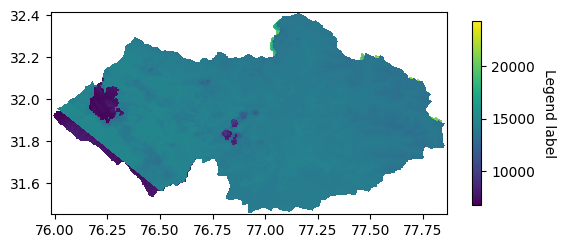

Minimum: 6738
Maximum: 24325
Mean: 14066.0086914008
Standard Deviation: 424.03853597574795


In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the DEM raster file
dem_in = rasterio.open('/content/DEM.tif')
dem_data = dem_in.read(1, masked=True)

# Open the raster file
src = rasterio.open(imgs_path_b1[4])
data = src.read(1, masked=True)

left, bottom, right, top = src.bounds

# Calculate the statistics of the data
min_val = np.min(data)
max_val = np.max(data)
mean_val = np.mean(data)
std_val = np.std(data)

# Create a plot
fig, ax = plt.subplots()

# Show the raster on the plot
ax.imshow(dem_data, extent=[left, right, bottom, top])
im = ax.imshow(data, extent=[left, right, bottom, top])

# Add a legend
cbar = plt.colorbar(im, ax=ax, shrink=0.5)

# Set the label for the legend
cbar.ax.set_ylabel('Legend label', rotation=270, labelpad=15)

# Show the plot
plt.show()

# Print the statistics
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Mean:", mean_val)
print("Standard Deviation:", std_val)


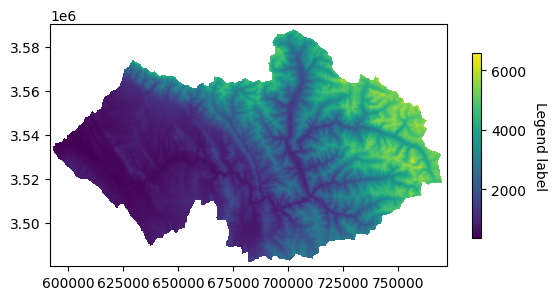

Minimum: 380.0
Maximum: 6585.0
Mean: 2265.8463257381027
Standard Deviation: 1469.4719098080282


In [31]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling


dem_path = f'/content/DEM.tif'
output_path = f'/content/output_reprojected.tif'

def reproject_raster(src, dst_crs, dst_transform, dst_width, dst_height):
    dst_profile = src.profile.copy()
    dst_profile.update(crs=dst_crs, transform=dst_transform, width=dst_width, height=dst_height)
    dst_array = np.zeros((src.count, dst_height, dst_width), dtype=src.dtypes[0])
    reproject(source=rasterio.band(src, 1), destination=dst_array, src_transform=src.transform,
              src_crs=src.crs, dst_transform=dst_transform, dst_crs=dst_crs, resampling=Resampling.nearest)
    return dst_profile, dst_array

def reprojection_function(ndsi_path, dem_path):
    with rasterio.open(ndsi_path) as ndsi_src:
        ndsi_profile = ndsi_src.profile
        ndsi_crs = ndsi_src.crs
        ndsi_transform = ndsi_src.transform
        ndsi_width = ndsi_src.width
        ndsi_height = ndsi_src.height

    with rasterio.open(dem_path) as dem:
        dem_profile, dem_array = reproject_raster(src=dem, dst_crs=dem.crs, dst_transform=dem.transform,
                                                  dst_width=dem.width, dst_height=dem.height)

    with rasterio.open(output_path, 'w', **dem_profile) as ndsi_dst:
        ndsi_dst.write(dem_array[0].astype(rasterio.float32), 1)

reprojection_function(imgs_path_b1[4], dem_path)
# Open the DEM raster file
dem_in = rasterio.open(dem_path)
dem_data = dem_in.read(1, masked=True)

# Set the range values to select
min_range = 2000
max_range = 3000

# Apply the range condition to the DEM data
dem_data_range = np.where((dem_data >= min_range) & (dem_data <= max_range), dem_data, np.nan)

# Open the raster file
src = rasterio.open(output_path)
data = src.read(1, masked=True)

left, bottom, right, top = dem_in.bounds

# Calculate the statistics of the data
min_val = np.min(data)
max_val = np.max(data)
mean_val = np.mean(data)
std_val = np.std(data)

# Create a plot
fig, ax = plt.subplots()

# Show the raster on the plot
ax.imshow(dem_data_range, extent=[left, right, bottom, top])
im = ax.imshow(data, extent=[left, right, bottom, top])

# Add a legend
cbar = plt.colorbar(im, ax=ax, shrink=0.5)

# Set the label for the legend
cbar.ax.set_ylabel('Legend label', rotation=270, labelpad=15)

# Show the plot
plt.show()

# Print the statistics
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Mean:", mean_val)
print("Standard Deviation:", std_val)


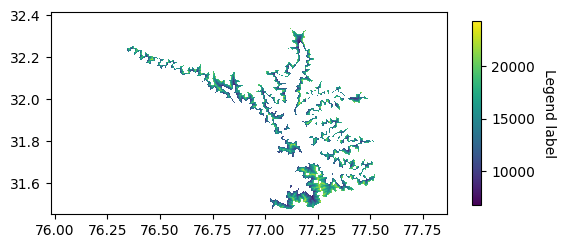

Minimum: 6738
Maximum: 24325
Mean: 14066.0086914008
Standard Deviation: 424.03853597574795


In [27]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the DEM raster file
dem_in = rasterio.open('/content/DEM.tif')
dem_data = dem_in.read(1, masked=True)

# Set the range values to select
min_range = 2000
max_range = 3000

# Apply the range condition to the DEM data
dem_data_range = np.where((dem_data >= min_range) & (dem_data <= max_range), dem_data, np.nan)

# Open the raster file
src = rasterio.open(imgs_path_b1[4])
data = src.read(1, masked=True)

left, bottom, right, top = src.bounds

# Calculate the statistics of the data
min_val = np.min(data)
max_val = np.max(data)
mean_val = np.mean(data)
std_val = np.std(data)

# Create a plot
fig, ax = plt.subplots()

# Show the raster on the plot
ax.imshow(dem_data_range, extent=[left, right, bottom, top])
# im = ax.imshow(data, extent=[left, right, bottom, top])

# Add a legend
cbar = plt.colorbar(im, ax=ax, shrink=0.5)

# Set the label for the legend
cbar.ax.set_ylabel('Legend label', rotation=270, labelpad=15)

# Show the plot
plt.show()

# Print the statistics
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Mean:", mean_val)
print("Standard Deviation:", std_val)
